## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    mx, mn = x.max(),x.min()
    return ((x-mn)/(mx-mn))*2-1
#     x = x / 255.
#     if flatten:
#         x = x.reshape((len(x), -1))
#     return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    x= keras.layers.Flatten(data_format=None)(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0715 00:28:01.581773 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 00:28:01.658293 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 00:28:01.672300 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32, 32, 512)       2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32, 32, 256)       131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32, 32, 128)       32896     
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
output (Dense)               (None, 10)                1310730   
Total params: 1,477,002
Trainable params: 1,477,002
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
# LEARNING_RATE = 0.001
# EPOCHS = 100
# BATCH_SIZE = 256

In [8]:
# optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
# model.fit(x_train, y_train, 
#           epochs=EPOCHS, 
#           batch_size=BATCH_SIZE, 
#           validation_data=(x_test, y_test), 
#           shuffle=True)

In [10]:
# import matplotlib.pyplot as plt


# train_loss = model.history.history["loss"]
# valid_loss = model.history.history["val_loss"]

# train_acc = model.history.history["acc"]
# valid_acc = model.history.history["val_acc"]

# plt.plot(range(len(train_loss)), train_loss, label="train loss")
# plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
# plt.legend()
# plt.title("Loss")
# plt.show()

# plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
# plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
# plt.legend()
# plt.title("Accuracy")
# plt.show()

In [11]:
import matplotlib.pyplot as plt
def calc(num_neurons):
    model = build_mlp(input_shape=x_train.shape[1:], output_units=10, num_neurons=num_neurons)
    model.summary()
    ## 超參數設定
    LEARNING_RATE = 0.001
    EPOCHS = 100
    BATCH_SIZE = 256
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)



    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]

    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    plt.plot(range(len(train_loss)), train_loss, label="train loss")
    plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
    plt.legend()
    plt.title("Loss")
    plt.show()

    plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
    plt.legend()
    plt.title("Accuracy")
    plt.show()

W0715 00:28:04.295136 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 00:28:04.352680 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32, 32, 512)       2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32, 32, 256)       131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32, 32, 128)       32896     
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
output (Dense)               (None, 10)                1310730   
Total params: 1,477,002
Trainable params: 1,477,002
Non-trainable params: 0
_________________________________________________________________


W0715 00:28:05.111950 15884 deprecation.py:323] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 00:28:05.477742 15884 deprecation_wrapper.py:119] From C:\Users\yulan\Anaconda3\envs\keras35\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 114s 2ms/step - loss: 1.6221 - acc: 0.4327 - val_loss: 1.4927 - val_acc: 0.4697
Epoch 2/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.4159 - acc: 0.5075 - val_loss: 1.4427 - val_acc: 0.5011
Epoch 3/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.3542 - acc: 0.5308 - val_loss: 1.4100 - val_acc: 0.5036
Epoch 4/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.2843 - acc: 0.5577 - val_loss: 1.4220 - val_acc: 0.5058
Epoch 5/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.2141 - acc: 0.5830 - val_loss: 1.4538 - val_acc: 0.4925
Epoch 6/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.1308 - acc: 0.6126 - val_loss: 1.5038 - val_acc: 0.4862
Epoch 7/100
50000/50000 [==============================] - 107s 2ms/step - loss: 1.0208 - acc: 0.6516 - val_loss: 1.

50000/50000 [==============================] - 107s 2ms/step - loss: 0.0563 - acc: 0.9821 - val_loss: 6.1819 - val_acc: 0.4026
Epoch 60/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0390 - acc: 0.9872 - val_loss: 6.1059 - val_acc: 0.4131
Epoch 61/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0288 - acc: 0.9909 - val_loss: 6.2171 - val_acc: 0.4016
Epoch 62/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0186 - acc: 0.9937 - val_loss: 6.2733 - val_acc: 0.4053
Epoch 63/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0151 - acc: 0.9953 - val_loss: 6.3507 - val_acc: 0.4056
Epoch 64/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0346 - acc: 0.9887 - val_loss: 6.3667 - val_acc: 0.4007
Epoch 65/100
50000/50000 [==============================] - 107s 2ms/step - loss: 0.0395 - acc: 0.9879 - val_loss: 6.3357 - val_acc: 0.3966
Epoch 66/100
50000/50000 [=======

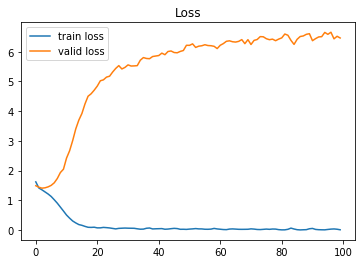

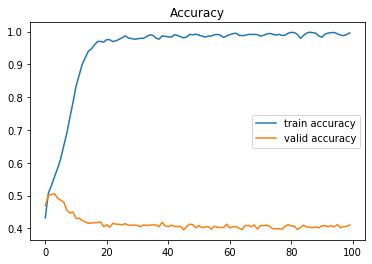

In [12]:
num_neurons=[512, 256, 128]
calc(num_neurons)

In [ ]:
num_neurons=[512,256,128,64,32]
calc(num_neurons)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32, 32, 512)       2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 32, 32, 256)       131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32, 32, 128)       32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 32, 32, 64)        8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32, 32, 32)        2080      
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
__________

50000/50000 [==============================] - 116s 2ms/step - loss: 0.0821 - acc: 0.9708 - val_loss: 6.1365 - val_acc: 0.3950
Epoch 50/100
50000/50000 [==============================] - 117s 2ms/step - loss: 0.0878 - acc: 0.9704 - val_loss: 6.0562 - val_acc: 0.3912
Epoch 51/100
50000/50000 [==============================] - 116s 2ms/step - loss: 0.0812 - acc: 0.9724 - val_loss: 6.1107 - val_acc: 0.3954
Epoch 52/100
50000/50000 [==============================] - 116s 2ms/step - loss: 0.0865 - acc: 0.9695 - val_loss: 6.1185 - val_acc: 0.3909
Epoch 53/100
50000/50000 [==============================] - 117s 2ms/step - loss: 0.0656 - acc: 0.9777 - val_loss: 6.2310 - val_acc: 0.3902
Epoch 54/100
50000/50000 [==============================] - 116s 2ms/step - loss: 0.0674 - acc: 0.9766 - val_loss: 6.2990 - val_acc: 0.3880
Epoch 55/100
50000/50000 [==============================] - 116s 2ms/step - loss: 0.0748 - acc: 0.9737 - val_loss: 6.2534 - val_acc: 0.3893
Epoch 56/100
50000/50000 [=======